# 1. Analysis & Planning Stage


# General Overview

We consider the problem of determining some areas in NYC, from which people pay more tips to NYC cabs. Therefore, we are interested in defining the meaning of "pay more tips" as well as "how much more is". To devise this solution we are using open sourced data from the NYC Taxi and Limousine Commission, which includes valuable information about all trips completed by cabs in NYC in June 2015. The structure of our solution focus on performing four core stages comprising: 1) Analysis and Planning 2) Development and Optimisation 3) Conclusion and Report and 4) Release and Presentation. Thus, rather than conducting full-fledged research, we are aimed at communicating our perspective of a possible solution to this ambitious problem by using some machine learning techniques, and discussing the substantial benefits and disavantages of the approach developed.



# 1.1 Dataset

As mentioned before, the dataset consists of information about 12,324,935 trips completed by cabs in NYC during June 2015. The raw data, contained in a .csv file, includes 19 fields in total with data like pickup time, number of passengers, tip amounts, and so on.  


# 1.2 Main Tools

We are using Python through Jupyter as the main programming language to build our solution. Subsequently, we take advantage of the following libraries:

    * Petl
    * matplotlib
    * Seaborn
    * scikit-learn
    * Pandas
    * NumPy
    
Similarly, we are going to use Github to release our solution in the repository https://github.com/Riccocez/NYC-Taxi-Tips.git


 

# 1.3 Raw Data Analysis

We start the solution of the problem by analysing the raw data contained in the dataset. With this analysis we want to find possible inconsistencies, typos or non-informative data that we can remove when cleaning up the dataset.

# 1.3.1 Raw Data Visualisation

First we are going to take a look at some of the trips contained in the raw data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import random

from petl import fromcsv, look, fieldnames, values, head, tail

import seaborn as sns

Therefore, we get the size of the dataset: 12,324,935 entries


In [3]:
raw_data = pd.read_csv('yellow_tripdata_2015-06.csv', skipinitialspace=True)
print "Number of trips registered: ", len(raw_data)

Number of trips registered:  12324935


And we also get the references that characterise each trip. By analysing the dataset, we realise that we have 19 sorts of data:

     1) VendorID
     2) tpep_pickup_datetime
     3) tpep_dropoff_datetime
     4) passenger_count
     5) trip_distance
     6) pickup_longitude
     7) pickup_latitude
     8) RateCodeID
     9) store_and_fwd_flag
    10) dropoff_longitude
    11) dropoff_latitude
    12) payment_type
    13) fare_amount
    14) extra
    15) mta_tax
    16) tip_amount
    17) tolls_amount
    18) improvement_surcharge
    19) total_amount

In [4]:
raw_data.head(n=1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.95443,40.764141,1,N,-73.974754,40.754093,2,17,0,0.5,0,0,0.3,17.8


Considering the numeric type of data contained in the dataset, we perform a simple statistical analysis to determine informative outputs like mean, standard deviation, as well as maximum and minimum values. 

The purpose of this analysis is to:
    
       1) Determine the range of tips: Which apparently comprises between $-80.00 to $980.91. 
       2) Find possible outliers: We have already detected some of them ($-80.00 and $980.91 don't seem to be tip amounts commonly paid for an average passenger).
       3) Discover some potential correlations in data: Other types of information like fare_amount and trip distance can be potentially correlated. They can be auxiliary references to filter possible outliers within the dataset.

In [68]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000
mean,1.523565,1.681898,11.829076,-72.913847,40.166867,1.041832,-72.944737,40.184784,1.379517,13.204085,0.323405,0.497618,1.736538,0.316152,0.299721,16.378268
std,0.499444,1.335180,7678.550287,8.796762,4.843162,0.581957,8.669562,4.777574,0.499528,106.076575,0.480415,0.042148,2.637613,1.542573,0.012164,106.382788
min,1.000000,0.000000,0.000000,-759.233337,-67.136963,1.000000,-754.166687,-16.177874,1.000000,-300.000000,-30.500000,-0.500000,-80.000000,-14.000000,-0.300000,-300.000000
25%,1.000000,1.000000,1.010000,-73.991898,40.736141,1.000000,-73.991302,40.734627,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.750000,-73.981537,40.753235,1.000000,-73.979622,40.753799,1.000000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.230000,-73.966461,40.767929,1.000000,-73.962479,40.768787,2.000000,15.000000,0.500000,0.500000,2.350000,0.000000,0.300000,18.300000
max,2.000000,9.000000,10083318.000000,149.028534,69.702576,99.000000,125.535568,483.450012,5.000000,335413.690000,652.420000,60.350000,980.910000,900.970000,0.700000,335414.490000


"tip_amount" is clearly our main reference to based our analysis. However, the statistical analysis shows that this reference and additional fields like "trip_distance" contain outliers that are altering the distribution of the dataset.

To realise these inconsistencies, we visualise the entire set of trips using a 2D graph. The y-axis represents the corresponding tip amount to each of the 12 million trips contained in the dataset, and represented in the x_axis.

In [73]:
trip_IDs = [i for i in range(0, len(raw_data))]
tip_amounts = raw_data['tip_amount']


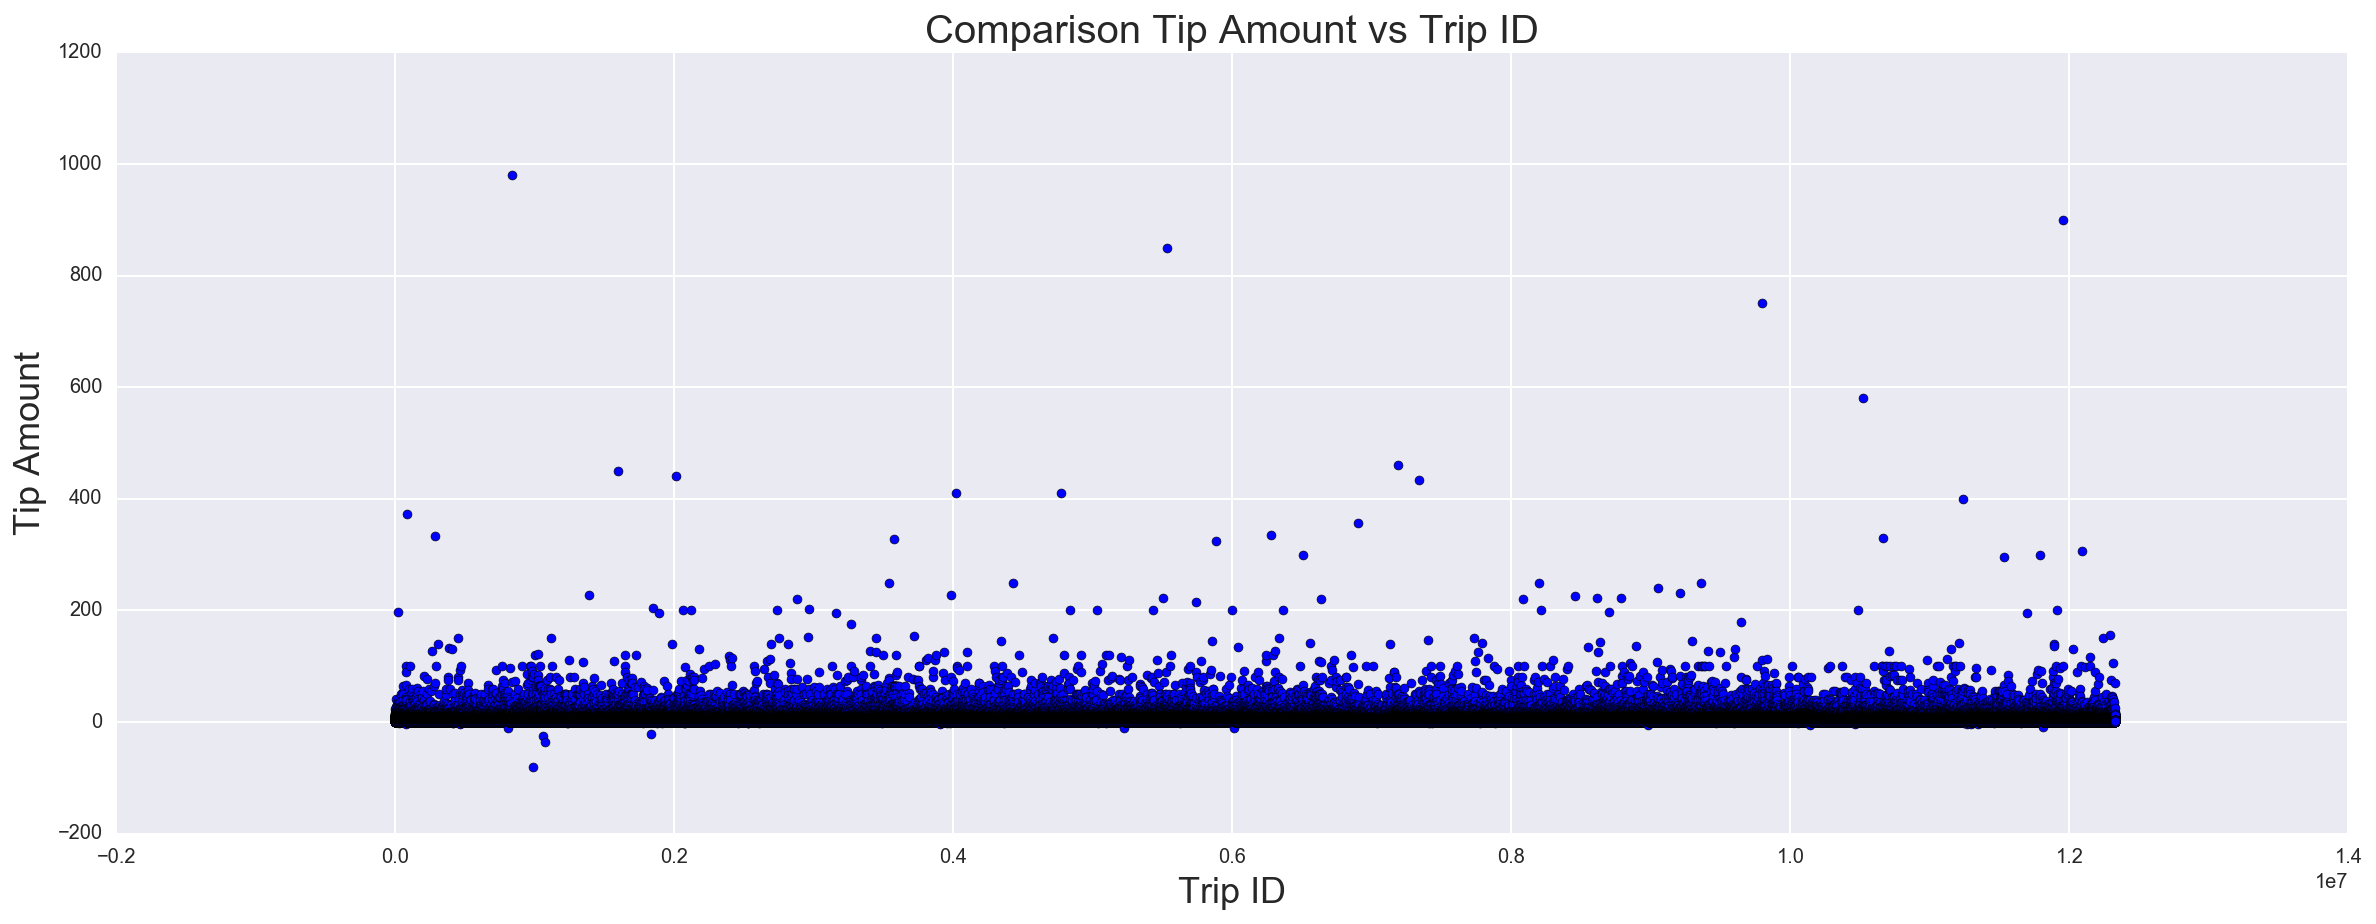

In [134]:
plt.figure(figsize=(20, 7))
plt.scatter(trip_IDs, tip_amounts)
plt.xlabel('Trip ID', fontsize = 18)
plt.ylabel('Tip Amount', fontsize = 18)
plt.title('Comparison Tip Amount vs Trip ID', fontsize = 20)
plt.show()

Based on this plot, we consider that highly potential outliers might be those not included in the range from \$0 to \$200. Nevertheless, we want to make sure that this assumption keeps describing the tip_amount distribution.

We compare the tip_amount with the fare_amount and the toll_amount before defining any boundaries to clean-up the dataset.

In [70]:
fare_amounts = raw_data['fare_amount']
tolls_amounts = raw_data['tolls_amount']

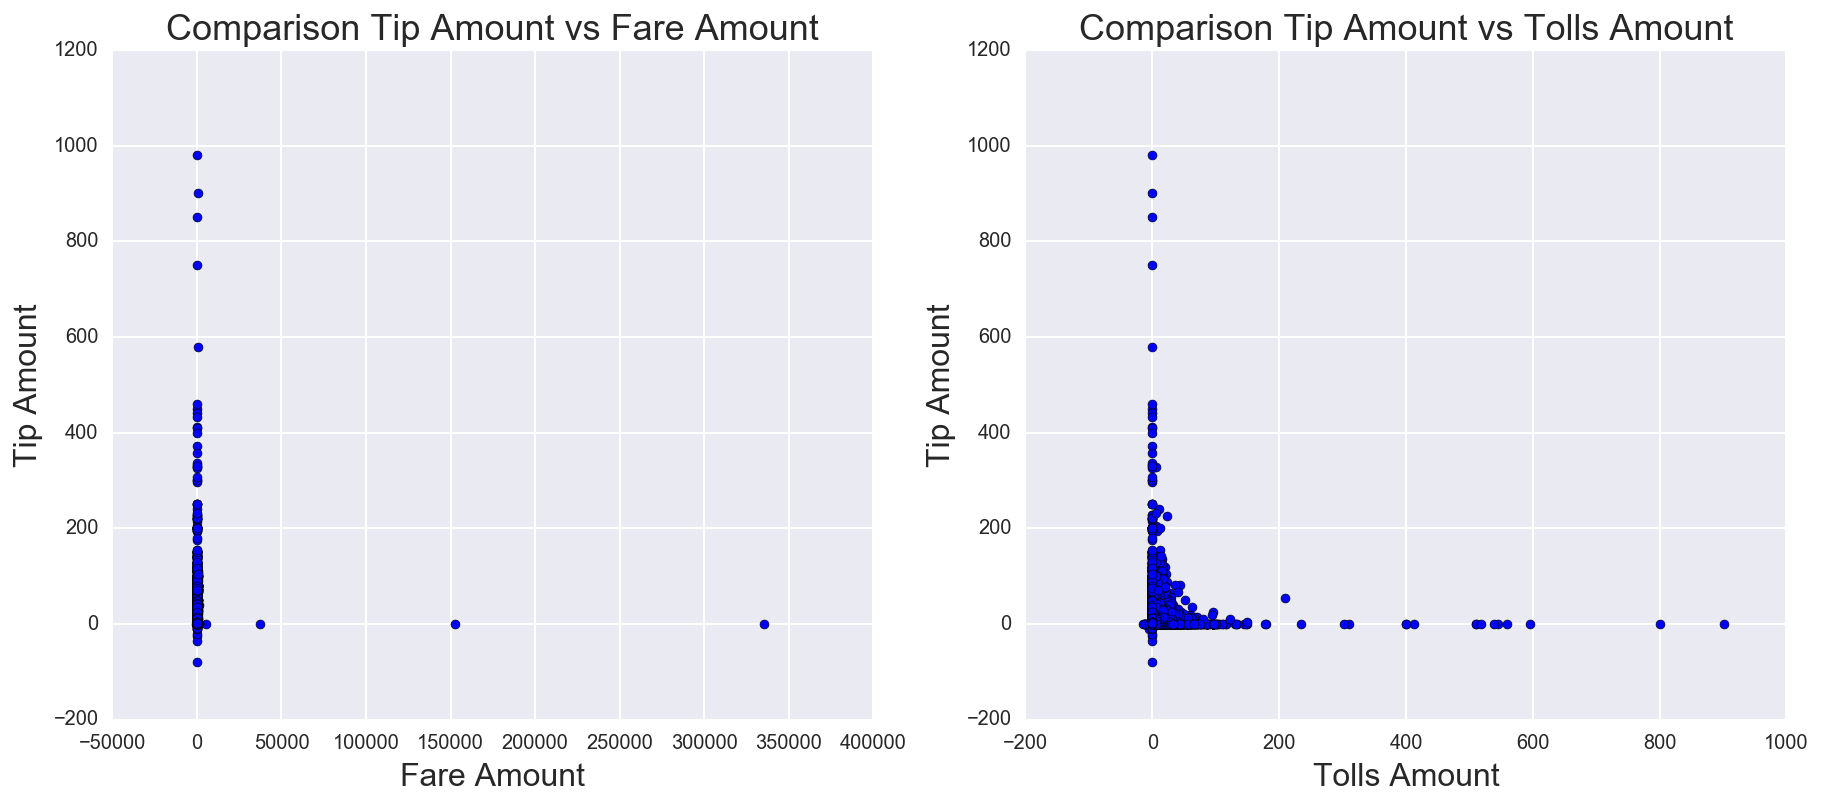

In [135]:
fig = plt.figure(figsize=(15, 6))
graph_1 = fig.add_subplot(1,2,1)
graph_2 = fig.add_subplot(1,2,2)

graph_1.set_title('Comparison Tip Amount vs Fare Amount', fontsize = 18)
graph_1.set_xlabel('Fare Amount', fontsize = 16)
graph_1.set_ylabel('Tip Amount', fontsize = 16)

graph_2.set_title('Comparison Tip Amount vs Tolls Amount', fontsize = 18)
graph_2.set_xlabel('Tolls Amount', fontsize = 16)
graph_2.set_ylabel('Tip Amount', fontsize = 16)

graph_1.scatter(fare_amounts, tip_amounts)
graph_2.scatter(tolls_amounts, tip_amounts)

plt.show()

Considering these comparisons it is clear that the distribution of tip amounts is mostly concentrated within \$0 and over \$250. Therefore, once we have more references to assume which entries are outliers, we perform the first clean-up of the dataset that consists on discriminating trips with:

    1) Tip amounts out of the range from \$0 to \$250.
    2) Fare amounts lower than \$0 and bigger than \$300.
    3) Tolls amounts not comprised within \$0 and \$200.
    

In [145]:
new_data = raw_data.loc[raw_data['tip_amount'] >= 0 ]

SyntaxError: invalid syntax (<ipython-input-145-822834179563>, line 1)

In [138]:
new_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
838917,1,2015-06-02 20:52:21,2015-06-02 21:00:06,1,2.2,-73.978249,40.766312,1,N,-73.952522,40.780720,3,8.5,0.5,0.5,980.91,0,0.3,990.71
5532704,1,2015-06-18 22:14:55,2015-06-18 22:23:02,1,5.6,-73.994637,40.701099,2,N,-74.015030,40.636784,1,52.0,0.0,0.5,850.00,0,0.3,902.80
11956483,1,2015-06-30 00:46:07,2015-06-30 00:47:02,1,0.7,-73.943039,40.850475,5,N,-73.935555,40.859848,1,900.0,0.0,0.0,900.30,0,0.3,1800.60
